## 导入我们需要用到的库

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
%matplotlib inline

## 用python爬虫获取数据

In [4]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita')
gdptable = r.text
soup = BeautifulSoup(gdptable, 'lxml')
table = soup.find('table', attrs = {"class" :"wikitable sortable"})


theads=[]
for tx in table.findAll('th'):
    theads.append(tx.text)

data =[]
for rows in table.findAll('tr'):
        row={}
        i=0
        for cell in rows.findAll('td'):
            row[theads[i]]=re.sub('\xa0', '',cell.text)
            i+=1
        if len(row)!=0:
            data.append(row)

print(data)


[{'Rank': '1', 'Country': 'Luxembourg', 'US$': '103,199'}, {'Rank': '2', 'Country': 'Switzerland', 'US$': '79,242'}, {'Rank': '3', 'Country': 'Norway', 'US$': '70,392'}, {'Rank': '—', 'Country': 'Macau', 'US$': '67,079'}, {'Rank': '4', 'Country': 'Ireland', 'US$': '62,562'}, {'Rank': '5', 'Country': 'Qatar', 'US$': '60,787'}, {'Rank': '6', 'Country': 'Iceland', 'US$': '59,629'}, {'Rank': '7', 'Country': 'United States', 'US$': '57,436'}, {'Rank': '8', 'Country': 'Denmark', 'US$': '53,744'}, {'Rank': '9', 'Country': 'Singapore', 'US$': '52,961'}, {'Rank': '10', 'Country': 'Australia', 'US$': '51,850'}, {'Rank': '11', 'Country': 'Sweden', 'US$': '51,165'}, {'Rank': '12', 'Country': 'San Marino', 'US$': '46,447'}, {'Rank': '13', 'Country': 'Netherlands', 'US$': '45,283'}, {'Rank': '14', 'Country': 'Austria', 'US$': '44,498'}, {'Rank': '—', 'Country': 'Hong Kong', 'US$': '43,528'}, {'Rank': '15', 'Country': 'Finland', 'US$': '43,169'}, {'Rank': '16', 'Country': 'Canada', 'US$': '42,210'}, 

将data转化为DataFrame格式

In [5]:
df=pd.DataFrame(data)

In [6]:
df.head()

,Country,Rank,US$
0,Luxembourg,1,"103,199"
1,Switzerland,2,"79,242"
2,Norway,3,"70,392"
3,Macau,—,"67,079"
4,Ireland,4,"62,562"


重命名列名，将"US$"改为"gdp_per_capita"

In [7]:
df=df.rename(columns = {"US$":"gdp_per_capital"})

In [8]:
df.head()

,Country,Rank,gdp_per_capital
0,Luxembourg,1,"103,199"
1,Switzerland,2,"79,242"
2,Norway,3,"70,392"
3,Macau,—,"67,079"
4,Ireland,4,"62,562"


## 删除列
有一些数据损坏！如果你查看 Rank 列，你会注意到散乱的随机破折号。这不是很好，由于实际的数字顺序被破坏，这使得 Rank 列无用，特别是使用 Pandas 默认提供的编号索引。

幸运的是，使用内置的 Python 方法：del，删除列变得很容易。

In [9]:
del df['Rank']

In [10]:
df.head()

,Country,gdp_per_capital
0,Luxembourg,"103,199"
1,Switzerland,"79,242"
2,Norway,"70,392"
3,Macau,"67,079"
4,Ireland,"62,562"


## 在列中转换数据类型
有时，给定的数据类型很难使用,我们首先在 Python 中使用 re 库。我们将使用正则表达式来替换 gdppercapita 列中的逗号，以便我们可以更容易地使用该列。re.sub 方法本质上是使用空格替换逗号

In [11]:
df['gdp_per_capital']=df['gdp_per_capital'].apply(lambda x: re.sub(',','',x))

In [12]:
df.head()

,Country,gdp_per_capital
0,Luxembourg,103199
1,Switzerland,79242
2,Norway,70392
3,Macau,67079
4,Ireland,62562


In [23]:
type(df['gdp_per_capital'][0])

numpy.int64

现在我们已经删除了逗号，我们可以轻易地将列转换为数字。

In [22]:
#df['gdp_per_capital']=df['gdp_per_capital'].astype('int')
df['gdp_per_capital'] = df['gdp_per_capital'].apply(pd.to_numeric)

In [26]:
df['gdp_per_capital'].mean()

13036.900523560209

## 选择/过滤数据
作为一个快速的代表，只显示人均 GDP 高于 5 万美元的国家。

In [38]:
df50000 = df[df['gdp_per_capital'] > 50000]
df50000

,Country,gdp_per_capital
0,Luxembourg,103199
1,Switzerland,79242
2,Norway,70392
3,Macau,67079
4,Ireland,62562
5,Qatar,60787
6,Iceland,59629
7,United States,57436
8,Denmark,53744
9,Singapore,52961


计算人均国民生产总值超过 5 万的总和。

In [39]:
df50000['gdp_per_capital'].sum()

770046

In [35]:
dfs=df[df['Country'].str.startswith('S')]
dfs

,Country,gdp_per_capital
1,Switzerland,79242
9,Singapore,52961
11,Sweden,51165
12,San Marino,46447
28,South Korea,27539
29,Spain,26609
37,Slovenia,21320
38,Saudi Arabia,20150
43,Slovakia,16499
46,Saint Kitts and Nevis,16058


In [34]:
len(dfs)

25

In [37]:
df[(df['Country'].str.startswith('S')) | (df['gdp_per_capital'] > 50000)]

,Country,gdp_per_capital
0,Luxembourg,103199
1,Switzerland,79242
2,Norway,70392
3,Macau,67079
4,Ireland,62562
5,Qatar,60787
6,Iceland,59629
7,United States,57436
8,Denmark,53744
9,Singapore,52961


我们将建立一个简单的直方图，显示人均 GDP 超过 5 万美元的国家的人均 GDP 分布。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x08D98330>]], dtype=object)

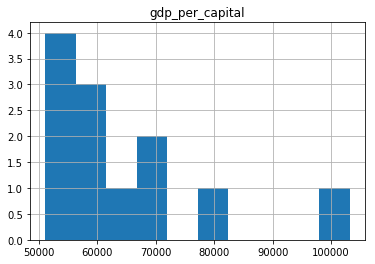

In [40]:
df50000.hist()

## 分组和连接数据
由 Pandas 中的merge 方法提供的连接功能与 SQL 通过 join 命令提供的连接功能非常相似，而 Pandas 还为过去在 Excel 中使用数据透视表的人提供了 pivot table 方法。

我们将制定的人均 GDP 的表格与世界银行的世界发展指数清单进行简单的连接。

首先导入世界发展指数的 .csv文件。


In [59]:
country = pd.read_csv("Country.csv")
country.columns

Index(['CountryCode', 'ShortName', 'TableName', 'LongName', 'Alpha2Code',
       'CurrencyUnit', 'SpecialNotes', 'Region', 'IncomeGroup', 'Wb2Code',
       'NationalAccountsBaseYear', 'NationalAccountsReferenceYear',
       'SnaPriceValuation', 'LendingCategory', 'OtherGroups',
       'SystemOfNationalAccounts', 'AlternativeConversionFactor',
       'PppSurveyYear', 'BalanceOfPaymentsManualInUse',
       'ExternalDebtReportingStatus', 'SystemOfTrade',
       'GovernmentAccountingConcept', 'ImfDataDisseminationStandard',
       'LatestPopulationCensus', 'LatestHouseholdSurvey',
       'SourceOfMostRecentIncomeAndExpenditureData',
       'VitalRegistrationComplete', 'LatestAgriculturalCensus',
       'LatestIndustrialData', 'LatestTradeData', 'LatestWaterWithdrawalData'],
      dtype='object')

In [46]:
gdpfinal=pd.merge(df,country,how="inner",left_on='Country', right_on = 'TableName')

In [47]:
gdpfinal

,Country,gdp_per_capital,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Luxembourg,103199,LUX,Luxembourg,Luxembourg,Grand Duchy of Luxembourg,LU,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,NaN,Yes,2010,2010.0,2013.0,1999.0
1,Switzerland,79242,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
2,Norway,70392,NOR,Norway,Norway,Kingdom of Norway,NO,Norwegian krone,NaN,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
3,Ireland,62562,IRL,Ireland,Ireland,Ireland,IE,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2010.0,2013.0,1979.0
4,Qatar,60787,QAT,Qatar,Qatar,State of Qatar,QA,Qatari riyal,NaN,Middle East & North Africa,...,Budgetary central government,General Data Dissemination System (GDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2012",NaN,Yes,NaN,2010.0,2013.0,2005.0
5,Iceland,59629,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
6,United States,57436,USA,United States,United States,United States of America,US,U.S. dollar,Fiscal year end: September 30; reporting perio...,North America,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0
7,Denmark,53744,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
8,Singapore,52961,SGP,Singapore,Singapore,Republic of Singapore,SG,Singapore dollar,Fiscal year end: March 31; reporting period fo...,East Asia & Pacific,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"National Health Survey (NHS), 2010",NaN,Yes,NaN,2011.0,2013.0,1975.0
9,Australia,51850,AUS,Australia,Australia,Commonwealth of Australia,AU,Australian dollar,Fiscal year end: June 30; reporting period for...,East Asia & Pacific,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0


现在我们有一个连接表，我们希望将国家和人均 GDP 按其所在地区进行分组。 我们现在可以使用 Pandas 中的 group 方法排列按区域分组的数据。

In [49]:
gdpregion = gdpfinal.groupby(['Region']).mean()
gdpregion

,gdp_per_capital,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
Region,,,,
East Asia & Pacific,11515.043478,2009.000000,2012.363636,2001.933333
Europe & Central Asia,25508.511111,2009.918919,2012.380952,2005.886364
Latin America & Caribbean,9283.068966,2007.076923,2012.000000,2005.607143
Middle East & North Africa,17910.937500,2009.642857,2012.200000,2002.625000
North America,49823.000000,2009.500000,2013.000000,1995.500000
South Asia,2751.875000,2008.500000,2012.000000,2006.625000
Sub-Saharan Africa,2311.720930,2007.937500,2010.825000,2002.697674


In [54]:
gdppivot = gdpfinal.pivot_table(index=['Region'],margins=True,aggfunc=np.mean)
gdppivot

,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,gdp_per_capital
Region,,,,
East Asia & Pacific,2009.000000,2012.363636,2001.933333,11515.043478
Europe & Central Asia,2009.918919,2012.380952,2005.886364,25508.511111
Latin America & Caribbean,2007.076923,2012.000000,2005.607143,9283.068966
Middle East & North Africa,2009.642857,2012.200000,2002.625000,17910.937500
North America,2009.500000,2013.000000,1995.500000,49823.000000
South Asia,2008.500000,2012.000000,2006.625000,2751.875000
Sub-Saharan Africa,2007.937500,2010.825000,2002.697674,2311.720930
All,NaN,NaN,NaN,NaN


In [55]:
gdppivot = gdpfinal.pivot_table(index=['Region'],aggfunc=np.mean)
gdppivot

,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,gdp_per_capital
Region,,,,
East Asia & Pacific,2009.000000,2012.363636,2001.933333,11515.043478
Europe & Central Asia,2009.918919,2012.380952,2005.886364,25508.511111
Latin America & Caribbean,2007.076923,2012.000000,2005.607143,9283.068966
Middle East & North Africa,2009.642857,2012.200000,2002.625000,17910.937500
North America,2009.500000,2013.000000,1995.500000,49823.000000
South Asia,2008.500000,2012.000000,2006.625000,2751.875000
Sub-Saharan Africa,2007.937500,2010.825000,2002.697674,2311.720930


删除不需要的列

In [57]:
gdppivot.drop(['LatestIndustrialData', 'LatestTradeData', 'LatestWaterWithdrawalData'], axis=1, inplace=True)

In [58]:
gdppivot

,gdp_per_capital
Region,
East Asia & Pacific,11515.043478
Europe & Central Asia,25508.511111
Latin America & Caribbean,9283.068966
Middle East & North Africa,17910.937500
North America,49823.000000
South Asia,2751.875000
Sub-Saharan Africa,2311.720930
